# CM3015 Machine Learning and Neural Networks - Coursework 2

## (a) Introduction

### Objective

In this notebook,  the objective is to create a neural network for identifying numbers based on handwritten digits. For example, when the input to the network is an image of a handwritten number 9, the corresponding prediction must also be the digit 9.

### MNIST Dataset

- MNIST is a collection of handwritten digits ranging from the number 0 to 9.
- The MNIST dataset comprises 60,000 training examples and 10,000 test examples of the handwritten digits 0–9, formatted as 28 x 28-pixel monochrome images.
- In Keras the MNIST dataset is preloaded in the form of four Numpy arrays.
- To use the MNIST dataset in Keras, an API is provided to download and extract images and labels automatically.

## (b) Methodology

### 1) Import necessary libraries

In [1]:
import numpy as np # linear algebra

import matplotlib.pyplot as plt # plotting library
%matplotlib inline

from tensorflow import keras 

### 2) Load MNIST dataset

In [2]:
# load dataset
from tensorflow.keras.datasets import mnist


# split dataset into training and test set
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### 2.1 Training and Test set

- `x_train` and `y_train` contain the training set, while

- `x_test` and `y_test` contain the test set.

- The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

#### 2.2 Data visualization

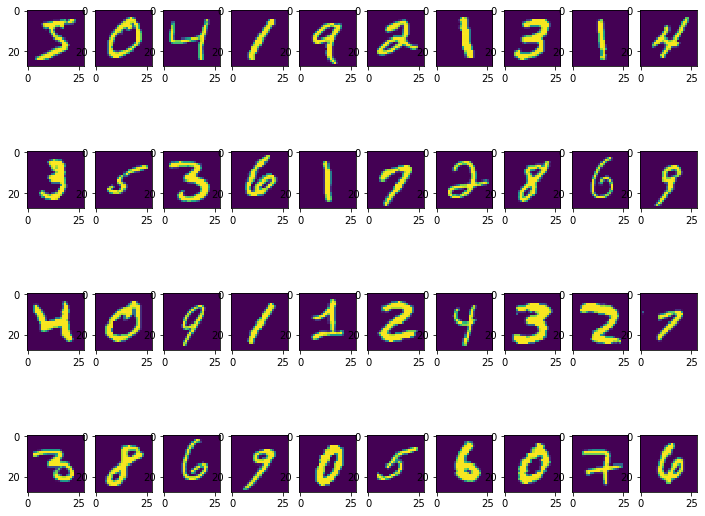

In [3]:
# preview the images first
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i].reshape((28,28)),interpolation='nearest')
plt.show()

#### To check the values and labels that we have loaded, we choose any of the images of the MNIST set, say for example image 8, and write the following Python code:

1


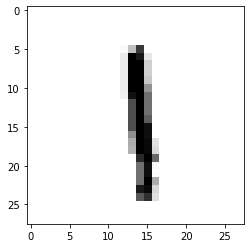

In [4]:
#View the values
plt.imshow(x_train[8], cmap=plt.cm.binary)

# View the labels
print(y_train[8])

### 3) Preprocess data

- Keras uses a multidimensional array of Numpy as a basic data structure. We call this data structure a **tensor**. 

- A tensor has three main attributes:

  - **Number of axes (Rank)**:  
  
    - A tensor containing a single number will be called **scalar** (or a 0-dimensional tensor, or tensor 0D). 
    - An array of numbers is called **vector**, or tensor 1D. 
    - An array of vectors will be a matrix, or 2D tensor. 
    - If we pack this matrix in a new array, we get a 3D tensor, which we can interpret visually as a cube of numbers. 
    - By packaging a 3D tensioner in an array, we can create a 4D tensioner and so on. 
    - In the Python Numpy library this is called the **tensor’s ndim**.
    
  - **Shape**:  
  
     - It is a tuple of integers that describe how many dimensions the tensor has along each axis. 
     - In the Numpy library this attribute is called **Shape**.
     
  - **Data type**: 
  
    - This attribute indicates the type of data that contains the tensor, which can be for example uint8, float32, float64, etc. 
    - In the Numpy library this attribute is called **dtype**.

In [5]:
# View number of dimensions of tensor
print('dimensions of tensor:',x_train.ndim)

# View the dimension of tensor
print('dimension of tensor',x_train.shape)

# View the data type of tensor
print('data type of tensor:',x_train.dtype)

dimensions of tensor: 3
dimension of tensor (60000, 28, 28)
data type of tensor: uint8


#### 3.1 Data normalization

- In deep learning, data is stored in tensors. The term tensor applies to a scalar (0D tensor), vector (1D tensor), matrix (2D tensor), and a multi-dimensional tensor.

- The rest code computes the image dimensions, input_size of the first Dense layer and scales each pixel value from 0 to 255 to range from 0.0 to 1.0. Although raw pixel values can be used directly, it is better to normalize the input data as to avoid large gradient values that could make training difficult.

- The output of the network is also normalized. After training, there is an option to put everything back to the integer pixel values by multiplying the output tensor by 255.

- The proposed model is based on MLP layers. Therefore, the input is expected to be a 1D tensor. So, x_train and x_test are reshaped to [60000, 28 28] and [10000, 28 28], respectively.

In [6]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [7]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


#### 3.2 One-Hot Encoding

- At this point, the labels are in digits format, 0 to 9.

- This sparse scalar representation of labels is not suitable for the neural network prediction layer that outputs probabilities per class.

- A more suitable format is called a one-hot vector, a 10-dim vector with all elements 0, except for the index of the digit class.

- For example, if the label is 5, the equivalent one-hot vector is [0,0,0,0,0,1,0,0,0,0]. The first label has index 0.

In [8]:
# convert to one-hot vector
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_test[0])
print(y_train[0])


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


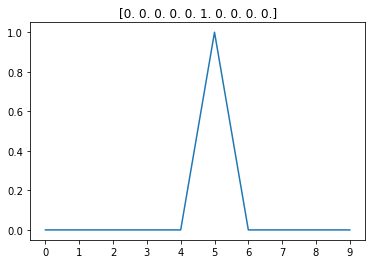

In [9]:
#plot 1st label
plt.title(y_train[0])
plt.plot(y_train[0])
plt.xticks(range(10));

In [10]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


### 4) Build network

- The main data structure in Keras is the <b>Sequential</b> class, which allows the creation of a basic neural network.
- The Sequential class of the Keras library is a wrapper for the sequential neural network model that Keras offers.
- The model in Keras is considered as a sequence of layers and each of them gradually “distills” the input data to obtain the desired output.
- In Keras, we can add the required types of layers through the .add() method.

#### 4.1 Defining the model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

model = Sequential()
model.add(Dense(256, input_dim=input_size))#784
model.add(Activation('relu'))
model.add(Dropout(0.45))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.45))
model.add(Dense(10))
model.add(Activation('softmax'))

In [12]:
#view model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2

The total number of parameters required can be computed as follows:

- From input to Dense layer: 784 × 256 + 256 = 200,960.

- From first Dense to second Dense: 256 × 256 + 256 = 65,792.

- From second Dense to the output layer: 10 × 256 + 10 = 2,570.

- The total is 200,690 + 65,972 + 2,570 = 269,322.

#### 4.2 Compile model with compile() method

- <b>Loss Function</b>
  - The first argument is the loss function.
  - We will use it to evaluate the degree of error between calculated outputs and the desired outputs of the training data.
  - In this example, we use <b>categorical_crossentropy</b> as the loss function. It is the negative of the sum of the product of the target and the logarithm of the prediction.

- <b>Optimizer</b>
  - The second argument is the optimizer.

  - It is the way we have to specify the optimization algorithm that allows the neural network to calculate the weights of the parameters from the input data and the defined loss function.
  - In this example, we use <b> rmsprop </b> as the optimizer function.

- <b>Metrics</b>
   - The third argument is the metrics.

   - We must indicate the metric that we will use to monitor the learning process and test of our neural network.

   - In this example, we will only consider the <b>accuracy</b> - the fraction of images that are correctly classified.

In [13]:
model.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics = ['accuracy'])

### 5) Train

#### 5.1 Train the model with fit() method 

- In the first two arguments (x_train, y_train) we have indicated the data with which we will train the model in the form of Numpy arrays.

- The batch_size argument indicates the number of data that we will use for each update of the model parameters.

- The epochs argument indicate the number of times we will use all the data in the learning process.

In [14]:
model.fit(x_train, y_train, epochs=20, batch_size=128)

Epoch 1/20
469/469 [==============================] - 25s 54ms/step - loss: 0.3968 - accuracy: 0.8785
Epoch 2/20
469/469 [==============================] - 24s 52ms/step - loss: 0.1919 - accuracy: 0.9444
Epoch 3/20
469/469 [==============================] - 26s 55ms/step - loss: 0.1565 - accuracy: 0.9533
Epoch 4/20
469/469 [==============================] - 48s 101ms/step - loss: 0.1344 - accuracy: 0.9616
Epoch 5/20
469/469 [==============================] - 31s 65ms/step - loss: 0.1215 - accuracy: 0.9652
Epoch 6/20
469/469 [==============================] - 24s 52ms/step - loss: 0.1124 - accuracy: 0.9686
Epoch 7/20
469/469 [==============================] - 24s 51ms/step - loss: 0.1091 - accuracy: 0.9692
Epoch 8/20
469/469 [==============================] - 25s 54ms/step - loss: 0.1052 - accuracy: 0.9719
Epoch 9/20
469/469 [==============================] - 26s 55ms/step - loss: 0.1002 - accuracy: 0.9728
Epoch 10/20
469/469 [==============================] - 24s 52ms/step - loss: 0.09

### 6) Test

#### 6.1 Evaluate model with evaluate() method

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=128)
print("\nTest accuracy: %.1f%%" % (100.0 * test_acc))
print("\nTest lost    :",test_loss)

79/79 [==============================] - 1s 11ms/step - loss: 0.1031 - accuracy: 0.9801

Test accuracy: 98.0%

Test lost    : 0.10305766761302948


## (c) Results and Conclusions

- In this kernel, I build a simple model to classify the MNIST digits and predict accuracy.
- We get the test accuracy of <b>98.0%</b>.
- The accuracy tells us that our model classifies the digits <b>98.0%</b> of time correctly.